## Abstract

A small charter school network has rolled out coverage pay for the 2023-2024 school year due to staff shortages and to fiscally incentivize staff to cover classes and other duties in Quarter 2(Q2), October 21, 2023 to January 19, 2024.There are five types of coverage with their respective pay rates they are as follows:

    1. After School Program Tutoring : 80 USD
    2. After School Program Clubs: 80 USD
    3. Long Term Class Coverage: 39.59 USD 
    4. Short Term Class Coverage: 30 USD 
    5. Non-Instructional Coverage: 25 USD

## Objecitve

The following questions will guide the analysis:

1. What was the total amount of coverage pay received in Q2?
2. What was the total amount of monthly coverage pay in Q2?
3. What was the total amount of coverage payreceive by each campus in Q2?

In [1]:
#importing packages
import pandas as pd
import matplotlib.pyplot as plt 
import datetime as dt

In [2]:
#importing Q2 Coverage Pay data
df = pd.read_csv(r"C:\Users\togarro\Downloads\Coverage Tracker (Responses) - Coverage Compensation - Q2.csv",parse_dates = ['Date', 'Date of Coverage'])

#Dropping columns 
df = df.drop(columns = ['Email Address', 'Supervisor','Coverage Approval','Approved/Unapproved','Unnamed: 3','Unnamed: 4','Unnamed: 5','Reference'])

In [91]:
#Dataset overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 1194 non-null   datetime64[ns]
 1   Name                 1194 non-null   object        
 2   Employee No          1194 non-null   int64         
 3   Date of Coverage     1194 non-null   datetime64[ns]
 4   Type of Coverage     1194 non-null   object        
 5   Campus               1194 non-null   object        
 6   Number of Coverages  1194 non-null   int64         
 7   Total Compensation   1194 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(2), object(3)
memory usage: 74.8+ KB


In [92]:
df.head()

,Date,Name,Employee No,Date of Coverage,Type of Coverage,Campus,Number of Coverages,Total Compensation
0,2024-01-10 11:20:05,Aarron Ritchie-Stokes,680,2024-01-08,Short Term,Middle,1,30.0
1,2024-01-11 11:58:49,Aarron Ritchie-Stokes,680,2024-01-02,Short Term,Middle,1,30.0
2,2023-10-31 16:07:36,Alice Lubrano,94,2023-10-03,Short Term,Elementary,3,90.0
3,2023-10-30 16:01:21,Alice Lubrano,94,2023-10-30,Non Instructional,Elementary,1,25.0
4,2023-11-02 13:22:40,Alice Lubrano,94,2023-11-02,Short Term,Elementary,1,30.0


In [93]:
#Dataset shape
df.shape

(1194, 8)

In [94]:
#Creating Year Month Column
df['Year-Month'] = df['Date of Coverage'].dt.strftime("%Y-%m")

### 1. What was the total amount of coverage pay received in Q2?

In [95]:
round(sum(df['Total Compensation']),2)

72039.37

In [96]:
df.groupby('Type of Coverage')['Total Compensation'].sum().sort_values(ascending = False)

Type of Coverage
After School Program Tutoring    19920.00
After School Program Clubs       14480.00
Long Term                        13579.37
Short Term                       12060.00
Non Instructional                12000.00
Name: Total Compensation, dtype: float64

After School Program Tutoring was the coverage type with the highest compensation total

In [97]:
sum(df['Number of Coverages'])

1654

In [98]:
df['Name'] = df['Name'].str.title()

In [99]:
#Data Cleaning
df['Name'] = df['Name'].str.title()

#Distribution
distribution = df.groupby('Name')['Total Compensation'].sum()
round(distribution.describe(),2)

count      76.00
mean      947.89
std      1108.68
min        25.00
25%       149.90
50%       477.30
75%      1518.75
max      5348.34
Name: Total Compensation, dtype: float64

In [100]:
#Coverage Type Count Totals
Coverage_Type_Total = df.groupby('Type of Coverage')['Number of Coverages'].sum().sort_values(ascending = False)
Coverage_Type_Total = pd.DataFrame(Coverage_Type_Total)

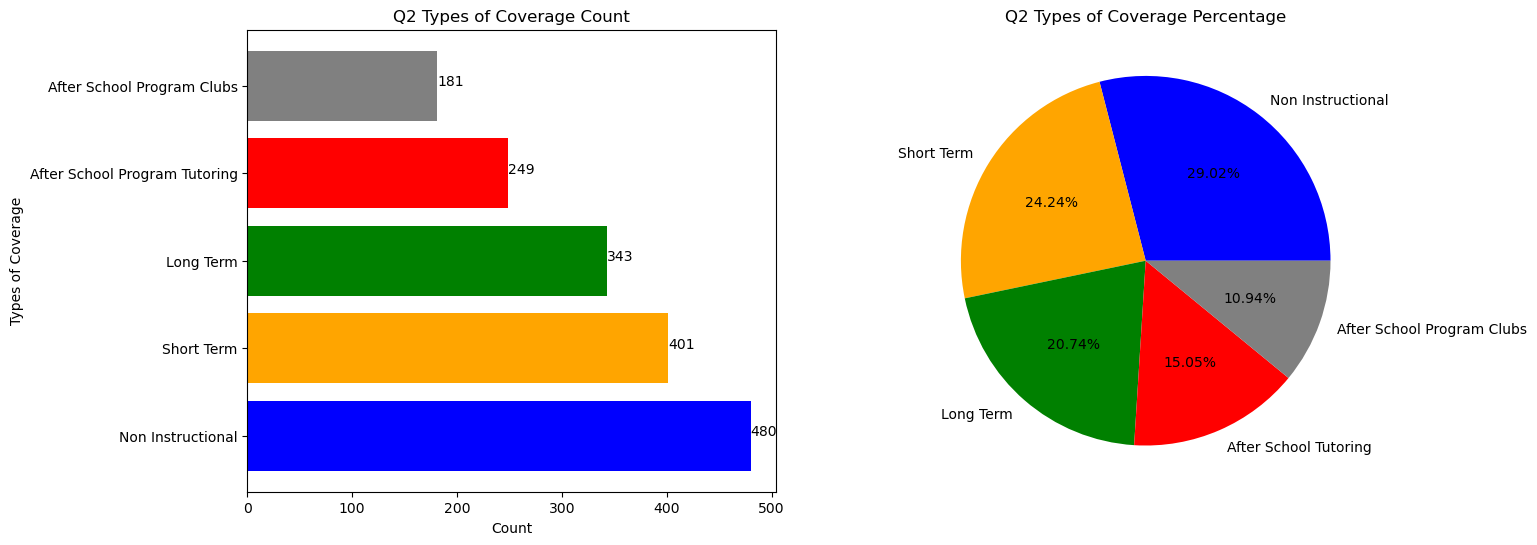

In [101]:
#Creating subplot figure 
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,6))
labels = ['Non Instructional','Short Term','Long Term','After School Tutoring', 'After School Program Clubs' ]
colors = ['blue','orange','green','red', 'gray']
#Plotting Coverage Type Count and Percentage Data
ax[0].barh(Coverage_Type_Total.index.values,Coverage_Type_Total['Number of Coverages'], color = colors)
ax[1].pie(Coverage_Type_Total['Number of Coverages'], autopct  = "%.2f%%", labels = labels,colors = colors)


#Titles
ax[0].set_title('Q2 Types of Coverage Count')
ax[1].set_title('Q2 Types of Coverage Percentage')

#Axis Labels
ax[0].set_ylabel('Types of Coverage')
ax[0].set_xlabel('Count')


#Data Lebls
for index,value in enumerate(Coverage_Type_Total['Number of Coverages']):
    ax[0].text(value, index,str(value))
    
plt.show()

In [102]:
#Coverage Type Totals Campus
Coverage_Type_Total_Campus = df.groupby(['Campus','Type of Coverage'])['Number of Coverages'].sum().reset_index()
Coverage_Type_Total_Campus = pd.DataFrame(Coverage_Type_Total_Campus)

#Creating Dataframes based on campuses
Collegiate_Campus_Coverage = Coverage_Type_Total_Campus[Coverage_Type_Total_Campus['Campus'] == 'Collegiate'].sort_values(by = 'Number of Coverages', ascending = False)
Middle_Campus_Coverage = Coverage_Type_Total_Campus[Coverage_Type_Total_Campus['Campus'] == 'Middle'].sort_values(by = 'Number of Coverages', ascending = False)
Elementary_Campus_Coverage = Coverage_Type_Total_Campus[Coverage_Type_Total_Campus['Campus'] == 'Elementary'].sort_values(by = 'Number of Coverages', ascending = False)

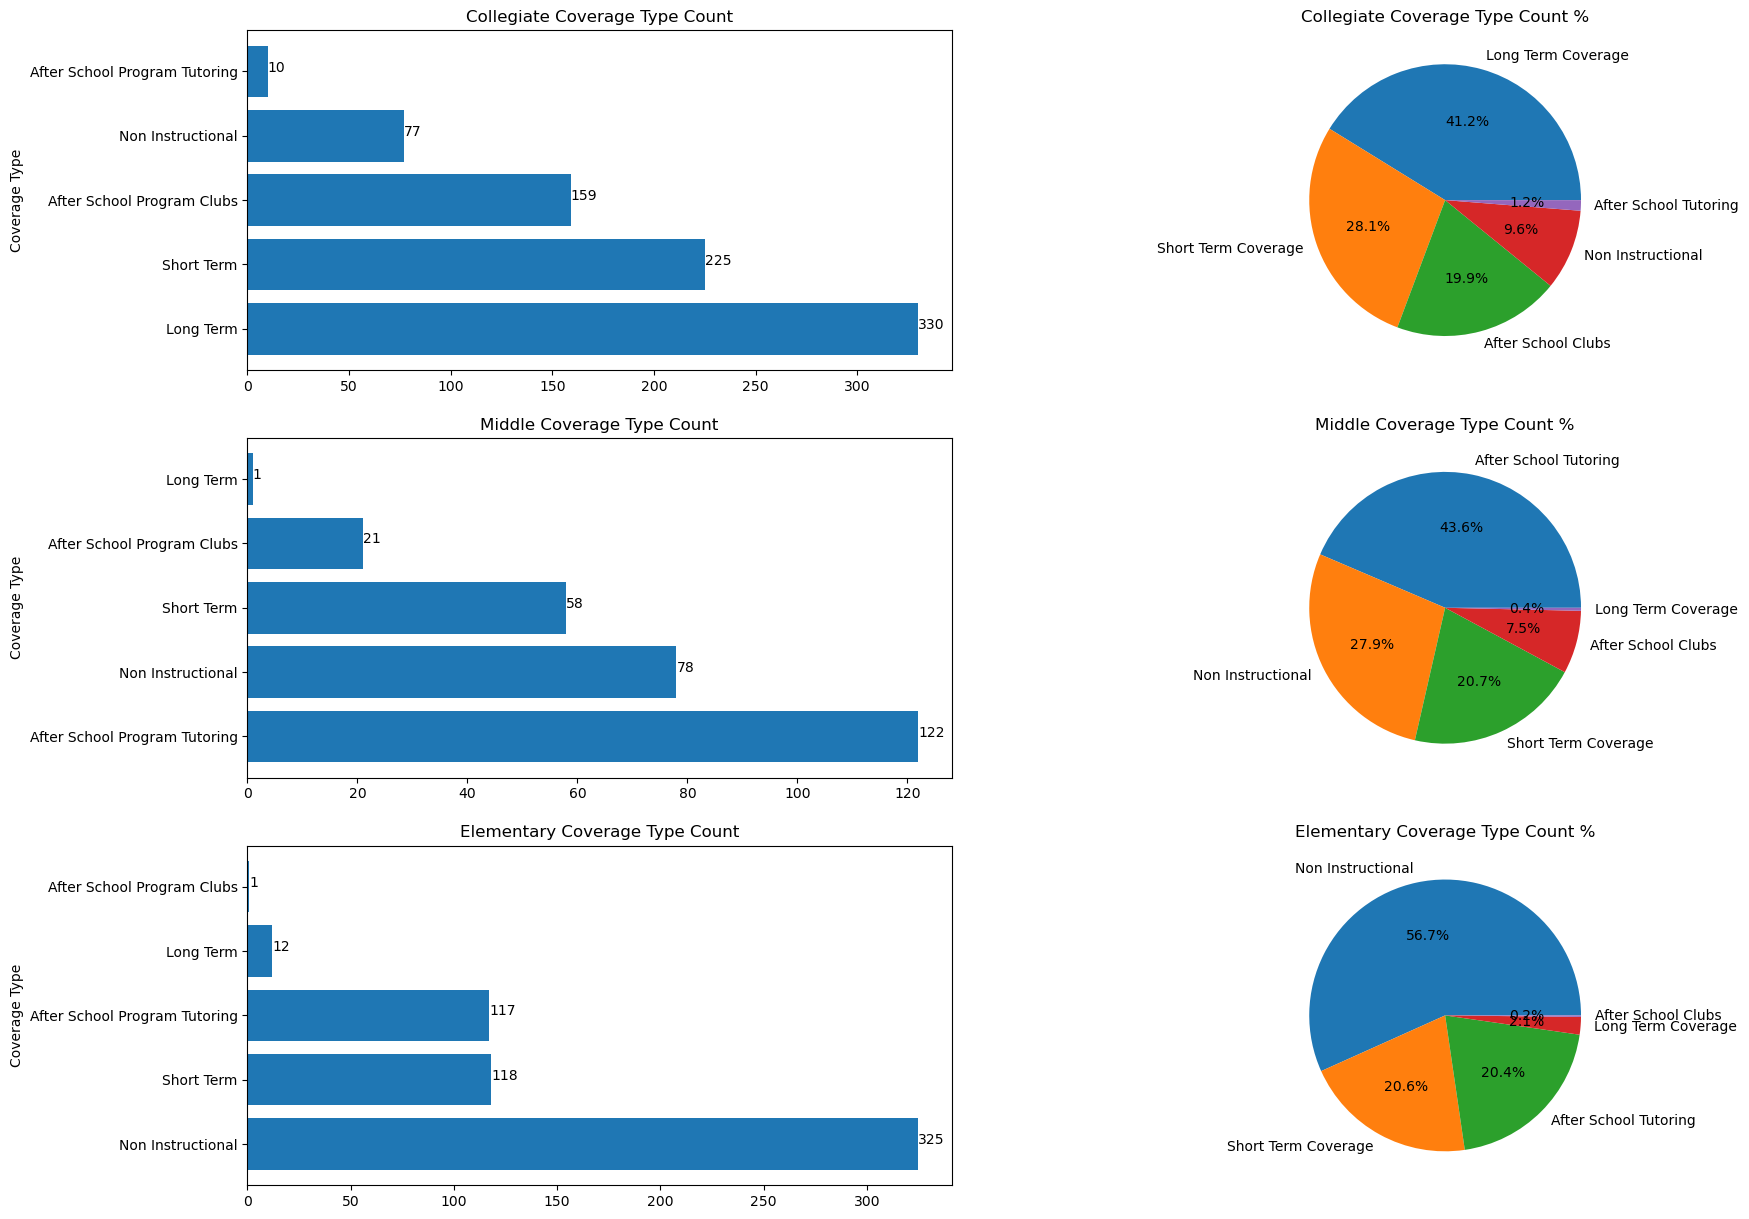

In [103]:
fig,ax = plt.subplots(nrows = 3, ncols = 2, figsize = (20, 15))

labels_collegiate = ['Long Term Coverage', 'Short Term Coverage','After School Clubs' ,'Non Instructional', 'After School Tutoring']
labels_middle = ['After School Tutoring','Non Instructional','Short Term Coverage','After School Clubs','Long Term Coverage']
labels_elementary = ['Non Instructional','Short Term Coverage','After School Tutoring','Long Term Coverage','After School Clubs']

#Plotting Data

#Collegiate Data
ax[0,0].barh(Collegiate_Campus_Coverage['Type of Coverage'],Collegiate_Campus_Coverage['Number of Coverages'] )
ax[0,1].pie(Collegiate_Campus_Coverage['Number of Coverages'], labels = labels_collegiate ,autopct = '%.1f%%' )

#Middle Data 
ax[1,0].barh(Middle_Campus_Coverage['Type of Coverage'],Middle_Campus_Coverage['Number of Coverages'] )
ax[1,1].pie(Middle_Campus_Coverage['Number of Coverages'],labels = labels_middle ,autopct = '%.1f%%' )


#Elementary Data 
ax[2,0].barh(Elementary_Campus_Coverage['Type of Coverage'],Elementary_Campus_Coverage['Number of Coverages'] )
ax[2,1].pie(Elementary_Campus_Coverage['Number of Coverages'],labels = labels_elementary ,autopct = '%.1f%%' )

#Titles
ax[0,0].set_title('Collegiate Coverage Type Count')
ax[0,1].set_title('Collegiate Coverage Type Count %')
ax[1,0].set_title('Middle Coverage Type Count')
ax[1,1].set_title('Middle Coverage Type Count %')
ax[2,0].set_title('Elementary Coverage Type Count')
ax[2,1].set_title('Elementary Coverage Type Count %')

#Axis Labels
ax[0,0].set_ylabel('Coverage Type')
ax[1,0].set_ylabel('Coverage Type')
ax[2,0].set_ylabel('Coverage Type')

#Data labels
for index, value in enumerate(Collegiate_Campus_Coverage['Number of Coverages']):
    ax[0,0].text(value, index, str(value))
    
for index, value in enumerate(Middle_Campus_Coverage['Number of Coverages']):
    ax[1,0].text(value, index, str(value))
    
    
for index, value in enumerate(Elementary_Campus_Coverage['Number of Coverages']):
    ax[2,0].text(value, index, str(value))

    
plt.show()

In [104]:
#Coverage Type Compensation Totals
Coverage_Type_Compensation = df.groupby('Type of Coverage')['Total Compensation'].sum()
Coverage_Type_Compensation = pd.DataFrame(Coverage_Type_Compensation)

In [105]:
#Coverage Type Compensation Totals
Coverage_Type_Compensation = df.groupby('Type of Coverage')['Total Compensation'].sum().sort_values(ascending = False)
Coverage_Type_Compensation = pd.DataFrame(Coverage_Type_Compensation)

In [106]:
Coverage_Type_Compensation

,Total Compensation
Type of Coverage,
After School Program Tutoring,19920.00
After School Program Clubs,14480.00
Long Term,13579.37
Short Term,12060.00
Non Instructional,12000.00


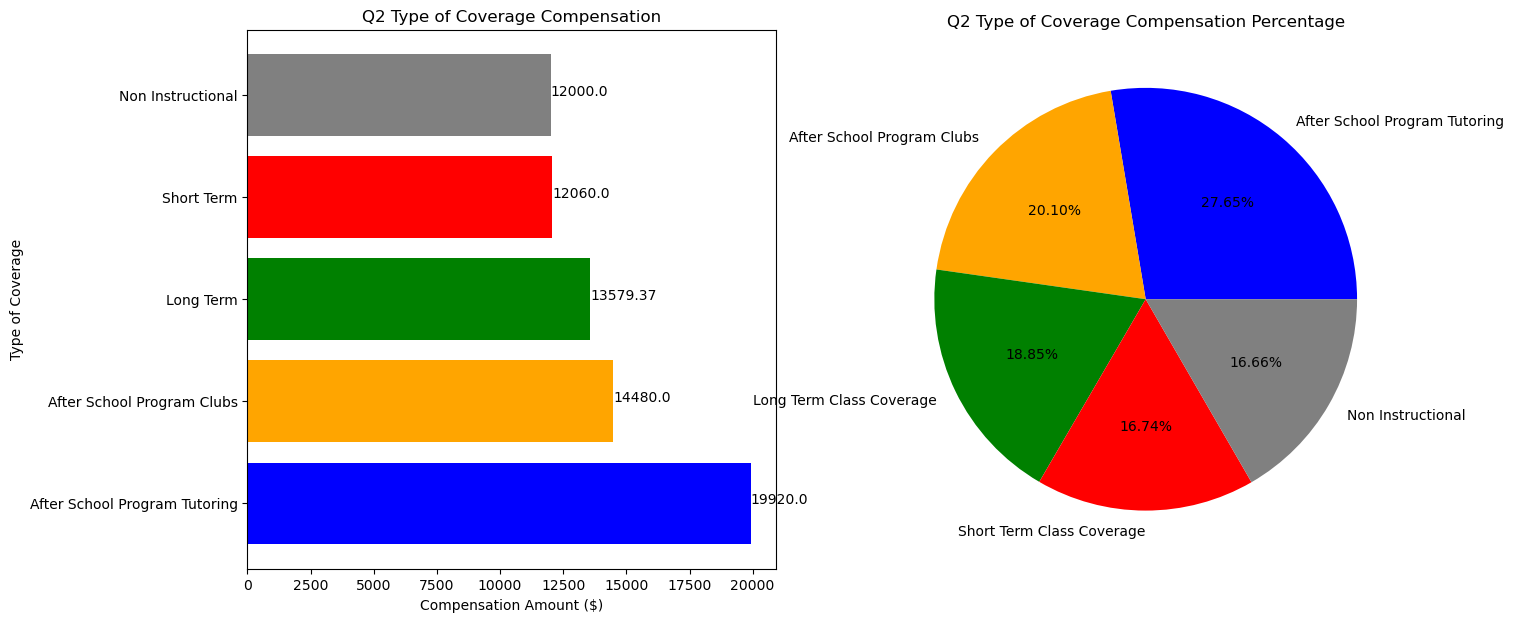

In [107]:
#Creatig subplot figure
fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,7))
labels = ['After School Program Tutoring','After School Program Clubs' ,'Long Term Class Coverage', 'Short Term Class Coverage','Non Instructional']
colors1 = ['blue', 'orange','green','red','gray']
#Plotting Coverage Type Compensation Data
ax[0].barh(Coverage_Type_Compensation.index.values,Coverage_Type_Compensation['Total Compensation'],color = colors1   )
ax[1].pie(Coverage_Type_Compensation['Total Compensation'], labels = labels, autopct = '%.2f%%',colors = colors1)

#Titles
ax[0].set_title('Q2 Type of Coverage Compensation')
ax[1].set_title('Q2 Type of Coverage Compensation Percentage')

#Axis Labels
ax[0].set_xlabel('Compensation Amount ($)')
ax[0].set_ylabel('Type of Coverage')

#Data Labels
for index, value in enumerate (round(Coverage_Type_Compensation['Total Compensation'],2)):
    ax[0].text(value,index, str(value))

plt.show()

In [108]:
#Coverage Type Compensation Totals - Campus
Coverage_Type_Compensation_Campus_Total = round(df.groupby(['Campus','Type of Coverage'])['Total Compensation'].sum().reset_index(),2)
Coverage_Type_Compensation_Campus_Total = pd.DataFrame(Coverage_Type_Compensation_Campus_Total)

#Creating Campus Dataframes
Coverage_Type_Collegiate_Total = Coverage_Type_Compensation_Campus_Total[Coverage_Type_Compensation_Campus_Total['Campus'] == 'Collegiate'].sort_values(by = 'Total Compensation', ascending = False)
Coverage_Type_Middle_Total = Coverage_Type_Compensation_Campus_Total[Coverage_Type_Compensation_Campus_Total['Campus'] == 'Middle'].sort_values(by = 'Total Compensation', ascending = False)
Coverage_Type_Elementary_Total = Coverage_Type_Compensation_Campus_Total[Coverage_Type_Compensation_Campus_Total['Campus'] == 'Elementary'].sort_values(by = 'Total Compensation', ascending = False)

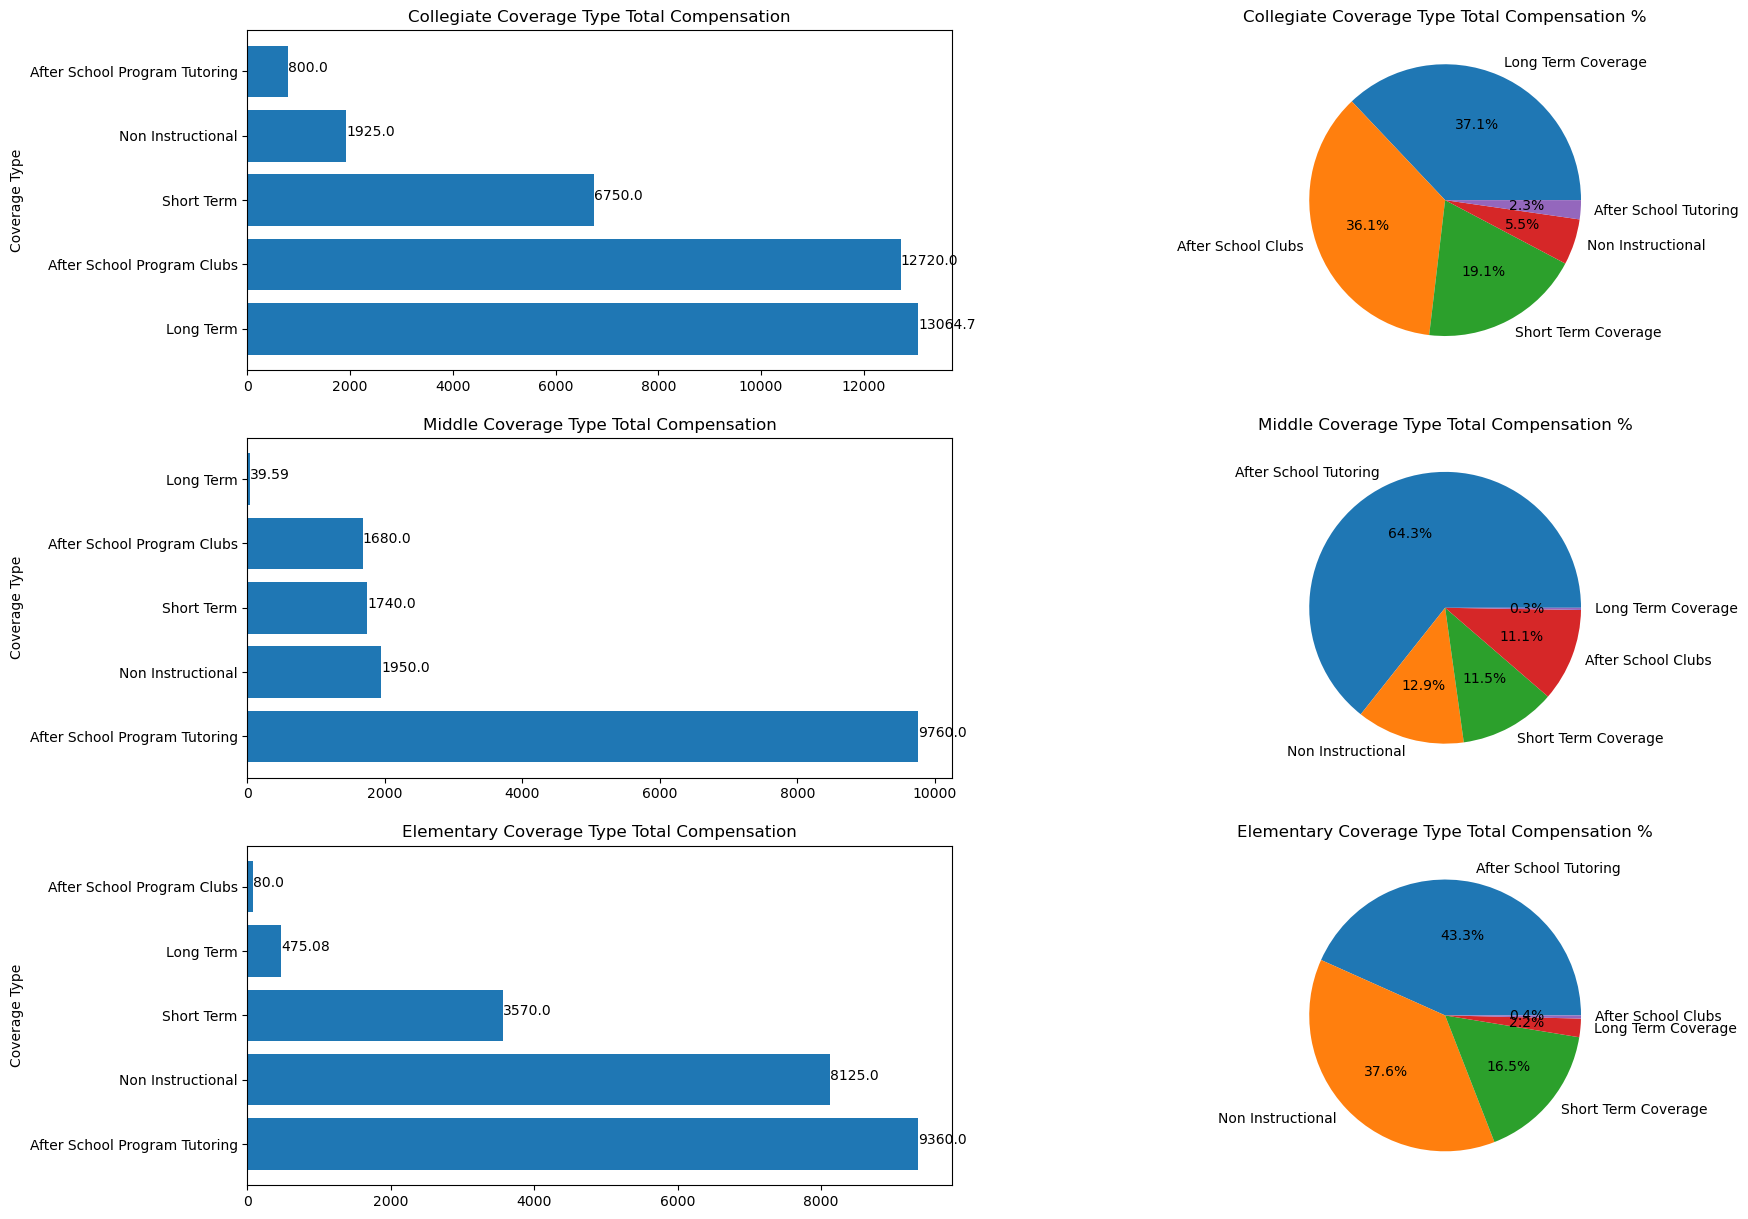

In [109]:
#Creating subplot figure
fig,ax = plt.subplots(nrows = 3, ncols =2, figsize = (20,15))

#labels 
collegiate_labels = ['Long Term Coverage','After School Clubs','Short Term Coverage', 'Non Instructional','After School Tutoring']
middle_labels = ['After School Tutoring','Non Instructional','Short Term Coverage','After School Clubs','Long Term Coverage']
elementary_labels = ['After School Tutoring', 'Non Instructional','Short Term Coverage','Long Term Coverage','After School Clubs']

#Plotting Data

#Collegiate Data
ax[0,0].barh(Coverage_Type_Collegiate_Total['Type of Coverage'], Coverage_Type_Collegiate_Total['Total Compensation'])
ax[0,1].pie(Coverage_Type_Collegiate_Total['Total Compensation'], autopct = '%.1f%%', labels = collegiate_labels )

#Middle Data
ax[1,0].barh(Coverage_Type_Middle_Total['Type of Coverage'], Coverage_Type_Middle_Total['Total Compensation'])
ax[1,1].pie(Coverage_Type_Middle_Total['Total Compensation'], autopct = '%.1f%%', labels = middle_labels)


#Elementary Data
ax[2,0].barh(Coverage_Type_Elementary_Total['Type of Coverage'], Coverage_Type_Elementary_Total['Total Compensation'])
ax[2,1].pie(Coverage_Type_Elementary_Total['Total Compensation'], autopct = '%.1f%%', labels = elementary_labels)

#Titles
ax[0,0].set_title('Collegiate Coverage Type Total Compensation')
ax[0,1].set_title('Collegiate Coverage Type Total Compensation %')
ax[1,0].set_title('Middle Coverage Type Total Compensation')
ax[1,1].set_title('Middle Coverage Type Total Compensation %')
ax[2,0].set_title('Elementary Coverage Type Total Compensation')
ax[2,1].set_title('Elementary Coverage Type Total Compensation %')

#Axis Labels
ax[0,0].set_ylabel('Coverage Type')
ax[1,0].set_ylabel('Coverage Type')
ax[2,0].set_ylabel('Coverage Type')

#Data Labels

for index,value in enumerate (Coverage_Type_Collegiate_Total['Total Compensation']):
    ax[0,0].text(value, index, str(value), ha = 'left')
    

for index, value in enumerate (Coverage_Type_Middle_Total['Total Compensation']):
    ax[1,0].text(value, index, str(value))
    

for index, value in enumerate (Coverage_Type_Elementary_Total['Total Compensation']):
    ax[2,0].text(value, index, str(value))

In total, there were 1654 coveregs submitted in Q2 totaling 72,039.37 USD. Non Instructional coverages accounted for the largest percentage, approximately 29%, of submitted coverages. However, After School Program Tutoring was the most expensive type of coverage pay despite only accounting for approximately for 15% of submitted coverages in Q2. Additionally, Long Term Coverages had the highest compensation total at the Collegiate Campus, 13,064.70, After School Program Tutoring had the highest compensation total at the Middle School Campus, 9,760.00 USD, and After School Program Tutoring had the highest compensation total at the Elementary Campus, 9,360.00 USD.

Overall, Non Instructional Coverages were the most frequent type of coverage, accounting for approximately 29 percent of coverages submitted in Q2.Long Term Coverages were the most frequent type of coverage submitted at the Collegiate campus, After School Program Tutoring was the most frequent type of coverage submitted at the Middle Campus, and Non Instructional Coverages were the most frequent type of coverage at the Elementary Campus.

Additionally, in Q2 there was an additional coverage type added during Q2,After School Program Clubs. 181, approximately 11 percent of coverage submissions were for After School Program Clubs which accounted for 14,480.00 USD, approximately 20 percent, the second highest coverage type total in Q2.

### 2. What was the total amount of monthly coverage pay received in Q2?

In [125]:
#Finding monthly coverage pay
Q2_monthly_pay = df.groupby('Year-Month')['Total Compensation'].sum()
Q2_monthly_pay = pd.DataFrame(Q2_monthly_pay)

#Renaming column
Q2_monthly_pay.rename(columns = {'Total Compensation': 'Monthly Coverage Pay'}, inplace = True)

#Slicing data because Q1 coverage put in during Q2.
Q2_monthly_pay = Q2_monthly_pay.iloc[1:5]


In [126]:
#Month with the greatest amount of coverage pay
Q2_monthly_pay.sort_values(by = 'Monthly Coverage Pay', ascending = False).head()

,Monthly Coverage Pay
Year-Month,
2023-11,24204.33
2023-12,23282.53
2024-01,14082.28
2023-10,9615.23


In [127]:
#MoM Change Metrics 
Q2_monthly_pay['MoM Change'] = Q2_monthly_pay['Monthly Coverage Pay'].diff().fillna(0)
Q2_monthly_pay['MoM Change Pct'] = round(Q2_monthly_pay['Monthly Coverage Pay'].pct_change(),2).multiply(100).fillna(0)

Q2_monthly_pay

,Monthly Coverage Pay,MoM Change,MoM Change Pct
Year-Month,,,
2023-10,9615.23,0.00,0.0
2023-11,24204.33,14589.10,152.0
2023-12,23282.53,-921.80,-4.0
2024-01,14082.28,-9200.25,-40.0


In [129]:
#Average MoM Change and MoM Change Pct
round(Q2_monthly_pay[['MoM Change','MoM Change Pct']].mean(),2)

MoM Change        1116.76
MoM Change Pct      27.00
dtype: float64

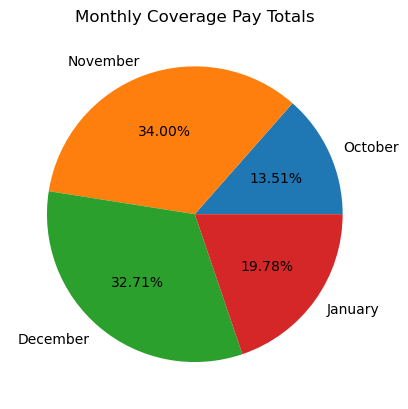

In [134]:
#Monthly Compensation Proportion Metrics
labels = ['October','November','December','January']
plt.pie(Q2_monthly_pay['Monthly Coverage Pay'], labels = labels,autopct = '%.2f%%')

#labels 
plt.title('Monthly Coverage Pay Totals')

plt.show()

November had the greatest total of coverage pay, totaling 24,204.33 USD, accounting for 34% of all coverage pay in Q2. Additionally, there is an upward trend in the amount of coverage pay total in each month in Q2. On average, there was an increase of  1,116.76 USD, approximately 27% per month.

### 3. What was the total amount of coverage pay received by each campus in Q2?

In [135]:
# Q2 Campus Compensation Metrics
Campus_Compensation = df.groupby('Campus')['Total Compensation'].sum().sort_values(ascending = False)
Campus_Compensation = pd.DataFrame(Campus_Compensation)
Campus_Compensation.rename(columns = {'Total Compensation':'Campus Compensation'}, inplace = True)

In [136]:
Campus_Compensation

,Campus Compensation
Campus,
Collegiate,35259.70
Elementary,21610.08
Middle,15169.59


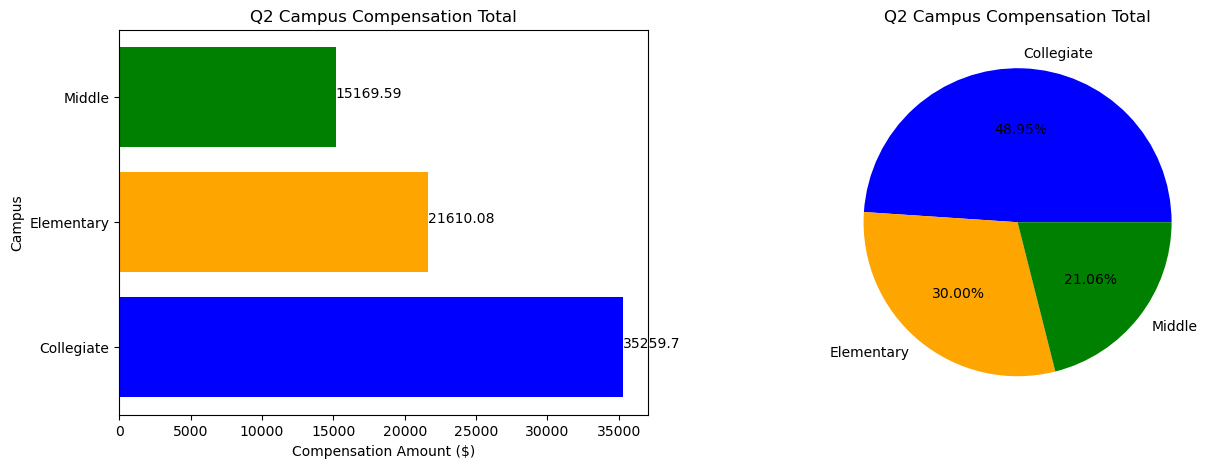

In [137]:
fig, ax = plt.subplots(nrows = 1 , ncols = 2, figsize = (15,5))
labels = ['Collegiate','Elementary', 'Middle']
colors2 = ['blue', 'orange', 'green']

#Plotting Data
ax[0].barh(Campus_Compensation.index.values,Campus_Compensation['Campus Compensation'], color = colors )
ax[1].pie(Campus_Compensation['Campus Compensation'], autopct = "%.2f%%", labels = labels, colors = colors )

#Labels
ax[0].set_xlabel('Compensation Amount ($)')
ax[0].set_ylabel('Campus')
ax[0].set_title ('Q2 Campus Compensation Total')
ax[1].set_title('Q2 Campus Compensation Total')

for index,value in enumerate(round(Campus_Compensation['Campus Compensation'],2)):
    ax[0].text(value, index, str(value))
    
plt.show()

In [138]:
# Q2 Campus Coverage Total 
Campus_Coverages = df.groupby('Campus')['Number of Coverages'].sum().sort_values(ascending = False)
Campus_Coverages  = pd.DataFrame(Campus_Coverages)

In [139]:
Campus_Coverages

,Number of Coverages
Campus,
Collegiate,801
Elementary,573
Middle,280


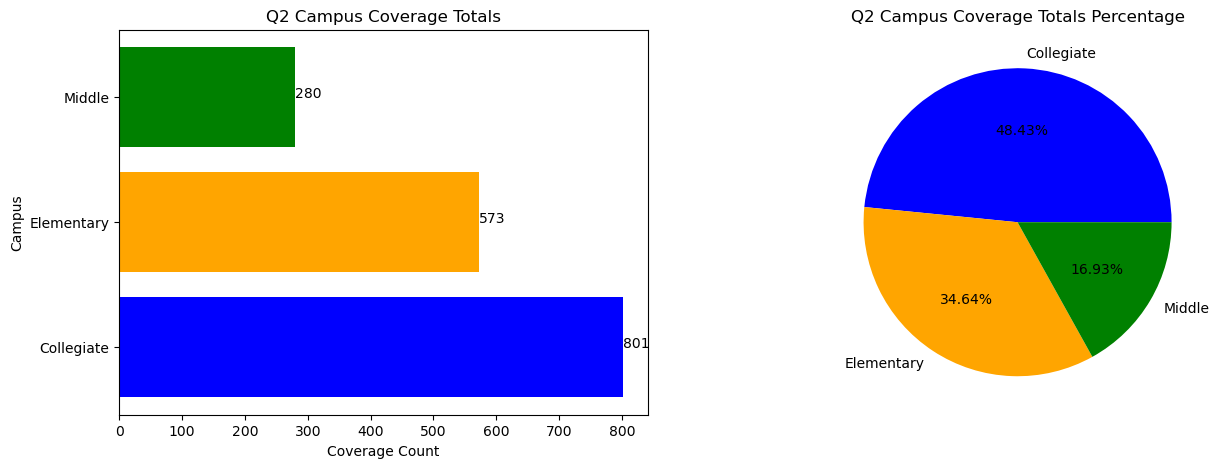

In [140]:
#Creating subplot figure
fig, ax = plt.subplots(nrows = 1 , ncols = 2, figsize = (15,5))
lables = ['Collegiate','Elementary', 'Middle']

#Plotting data
ax[0].barh(Campus_Coverages.index.values,Campus_Coverages['Number of Coverages'], color = colors)
ax[1].pie(Campus_Coverages['Number of Coverages'], autopct = "%.2f%%", labels = labels, colors = colors)

#Labels 
ax[0].set_xlabel('Coverage Count')
ax[0].set_ylabel('Campus')
ax[0].set_title('Q2 Campus Coverage Totals')
ax[1].set_title('Q2 Campus Coverage Totals Percentage')


for index,value in enumerate(Campus_Coverages['Number of Coverages']):
    ax[0].text(value, index, str(value))
    
#Displaying data
plt.show()

The Collegiate Campus was the campus with the highest total coverage pay in Q2, 35,259.70 USD, approximately 49 percent of total coverage pay. Also, the Collegiate Campus submitted the most coverages 801, approximately 48 percent, in Q2.

## Conclusion

In total there were 1654 coveregs submitted in Q2 totaling 72,039.37 USD. The Collegiate Campus had the greatest number of coverages submitted in Q2, 801, approximately 48 percent as well as the total coverage pay.

Also, Non Instructional coverages were the most frequest type of coverage type submission in Q2,480, approximately 29 percent.It is likely that Non Instructional coverage submissions will decrease significally due to a vacancy being filled. However, the After School Tutoring Program coverage type had the highest total, 19,920.00 USD, approximately 28 percent, despite only accounting for 249 submissions, approximately 15 percent of total submission in Q2. Additionally, After School Program Clubs had the second highest total coverage pay in Q2, 14,480.00 USD, approximately 20 percent, despite accounting for 181, approximately 11 percent, of coverages.

Furthermore, in Q2 there was an additional coverage type added during Q2,After School Program Clubs. 181, approximately 11 percent of coverage submissions were for After School Program Clubs which accounted for 14,480.00 USD, approximately 20 percent, the second highest coverage type total in Q2.

Lastly, there is an an upward trend in MoM Coverage Pay in Q2. On average there is an average increase of 1,116.76 USD, approximately 27 percent MoM increase in Q2 and is likely to conintue to increase in Q3.

The table below displays the amount left in each campus' budgt minus Q2 Coverage Pay as of January 2024:

|Campus|Current Teacher Salary Remaining|Q2 Coverage Pay Total| Budget Amount Remaining|
|---|---|---|---|
|Elementary|564,100.03|21,610.08|542,489.95|
|Middle|408,164.69|15,169.59|392,995.10|
|Collegiate|147,983.13|35,259.70|112,723.43|

## Recommendations

I have the following recommendations to reduce coverage pay in Q3:

Reduce the rates for After School Program Tutoring and After School Program clubs respectively. Currently, both have a rate of 80 USD per hour, approximately four times higher than the state average of 20 USD per hour. The table will display total cost of three rates, the current rate, 40 USD per hour, and the state average, 20 USD per hour based on the number of coverages submitted by staff in Q2:

|Type of Coverage|Number of Coverages|80 USD/hour|40 USD/ hour|20 USD/ hour|
|---|---|---|---|---|
|After School Program Clubs|181|14,480 USD|7,240 USD|3,620 USD|
|After School Program Tutoring|249|19,920 USD|9,960 USD|4,980 USD|


By reducing the After School Program Clubs rate to the state average there will be a reduction of 10,860 USD, a 75 percent reduction in cost.

By reducing the After School Program Tutoring rate to the state average there will be a reduction of 14,940, a 75 percent reduction in cost.


Additionally, redefining what is applicable as coverage pay. There were several instances in which coverage pay was submitted for duties that fell within the employees scope of work.

Lastly, making Long Term Coverage a stipend of 1,880.53, this the current rate, 39.59, mulitplied the average number of school days in each academic quarter, total school days, 190, divided by the total academic quarters,4.